[머신러닝] 독버섯 분류
- 데이터셋  : mushrooms.csv
- 알고리즘 : 지도학습>분류 => LogisticRegression, DecisionTreeClassifier, VotingClassifier
- 3개 알고리즘으로 구현 후 성능 비교


In [1]:
import pandas as pd

In [2]:
Mush = pd.read_csv('../data/Mushroom3.csv')

In [3]:
Mush = Mush.iloc[:, 1:]
Mush

,poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poison,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
1,enable,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,enable,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poison,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
4,enable,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,enable,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,enable,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,enable,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poison,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [4]:
for i in list(Mush.columns):
    print(i, ':', Mush[i].unique())

poison : ['poison' 'enable']
cap_shape : ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap_surface : ['smooth' 'scaly' 'fibrous' 'grooves']
cap_color : ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises : ['bruises' 'no']
odor : ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill_attachment : ['free' 'attached']
gill_spacing : ['close' 'crowded']
gill_size : ['narrow' 'broad']
gill_color : ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk_shape : ['enlarging' 'tapering']
stalk_root : ['equal' 'club' 'bulbous' 'rooted' 'missing']
stalk_surface_above_ring : ['smooth' 'fibrous' 'silky' 'scaly']
stalk_surface_below_ring : ['smooth' 'fibrous' 'scaly' 'silky']
stalk_color_above_ring : ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk_color_below_ring : ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
ve

In [5]:
Mush['stalk_root'].replace('missing','tapering', inplace=True)
Mush

,poison,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poison,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
1,enable,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,enable,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poison,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,nscattered,urban
4,enable,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,enable,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,enable,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,enable,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poison,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [6]:
for i in list(Mush.columns):
    print(i, ':', Mush[i].unique())

poison : ['poison' 'enable']
cap_shape : ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap_surface : ['smooth' 'scaly' 'fibrous' 'grooves']
cap_color : ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises : ['bruises' 'no']
odor : ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill_attachment : ['free' 'attached']
gill_spacing : ['close' 'crowded']
gill_size : ['narrow' 'broad']
gill_color : ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk_shape : ['enlarging' 'tapering']
stalk_root : ['equal' 'club' 'bulbous' 'rooted' 'tapering']
stalk_surface_above_ring : ['smooth' 'fibrous' 'silky' 'scaly']
stalk_surface_below_ring : ['smooth' 'fibrous' 'scaly' 'silky']
stalk_color_above_ring : ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk_color_below_ring : ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
v

In [7]:
Mush.to_csv('Mushroom_t.csv')

In [8]:
Mush_onehot = pd.get_dummies(Mush.iloc[:,1:])

Mush_onehot

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_numerous,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,False,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
8120,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
8121,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
8122,False,False,False,False,True,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,False


In [9]:
Mush['poison'].replace('poison',True, inplace=True)
Mush['poison'].replace('enable',False, inplace=True)


In [10]:
targetSR = Mush['poison']
featureDF = Mush.drop('poison', axis=1)

oh_targetSR = Mush['poison']
oh_featureDF = Mush_onehot

In [11]:
print(f'featureDF {featureDF.shape}, {featureDF.ndim}D')
print(f'targetSR {targetSR.shape}, {targetSR.ndim}D')

featureDF (8124, 22), 2D
targetSR (8124,), 1D


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

oh_X_train, oh_X_test, oh_y_train, oh_y_test = train_test_split(oh_featureDF, oh_targetSR, random_state=10, stratify=targetSR)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [15]:
dt_model = DecisionTreeClassifier(random_state=10)
lr_model = LogisticRegression(solver='liblinear')
v_model = VotingClassifier(estimators=[('dt_model' , dt_model) ,('lr_model' , lr_model)],
                           voting = 'hard')

In [16]:
dt_model.fit(oh_X_train, oh_y_train)
lr_model.fit(oh_X_train, oh_y_train)
v_model.fit(oh_X_train,oh_y_train)

VotingClassifier(estimators=[('dt_model',
                              DecisionTreeClassifier(random_state=10)),
                             ('lr_model',
                              LogisticRegression(solver='liblinear'))])

In [17]:
print(dt_model.score(oh_X_train, oh_y_train) , dt_model.score(oh_X_test, oh_y_test))
print(lr_model.score(oh_X_train, oh_y_train),lr_model.score(oh_X_test, oh_y_test))
print(v_model.score(oh_X_train,oh_y_train), v_model.score(oh_X_test, oh_y_test))

1.0 1.0
1.0 1.0
1.0 1.0


In [18]:
print(dt_model.feature_importances_)

[0.00000000e+00 6.56567633e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.96661921e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.52957999e-04 0.00000000e+00 2.28675730e-02 2.01570582e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.25901609e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.12458900e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.24228863e-03
 1.76955698e-01 0.00000000e+00 8.89055001e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.35341843e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

### graphviz

[gscv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gscv.best_score_] 0.9913012496447194
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=50)
[best_model.max_depth] : 4
[best_model.min_samples_leaf] : 2


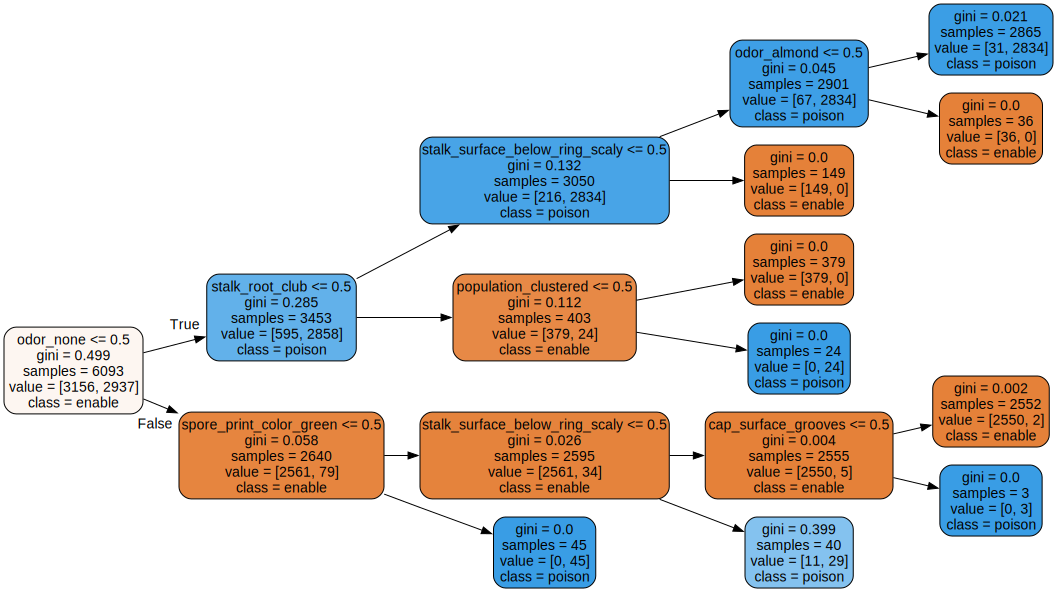

In [19]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(DecisionTreeClassifier(min_samples_split=50), param_grid={'max_depth':[4,3,2,1],
       'min_samples_leaf' : [2]})   # min_samples_split=50 << 분할 최소 단위 마지노선
gscv.fit(oh_X_train, oh_y_train)

print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] {gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

best_model = gscv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file = 'tree.dot', class_names = ['enable','poison'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True, rotate=True)

import graphviz

# 파일에서 데이터 읽어오기

with open('tree.dot') as f:
    dot_data = f.read()

graphviz.Source(dot_data)

[gscv.best_params_] {'max_depth': 9, 'min_samples_leaf': 2}
[gscv.best_score_] 0.9996717274785787
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=9, min_samples_leaf=2)
[best_model.max_depth] : 9
[best_model.min_samples_leaf] : 2


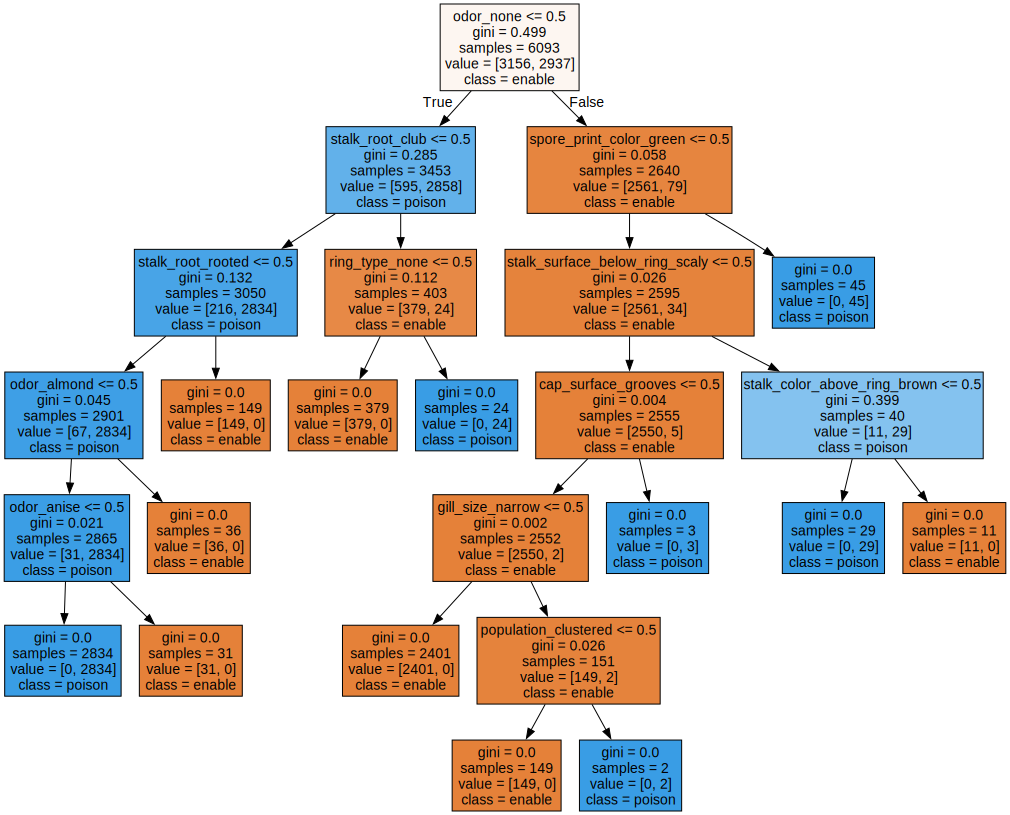

In [20]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth':[9,5,3,1],
       'min_samples_leaf' : [2]})
gscv.fit(oh_X_train, oh_y_train)

print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] {gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

best_model = gscv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file = 'tree.dot', class_names = ['enable','poison'],
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=False, rotate=False)

import graphviz

# 파일에서 데이터 읽어오기

with open('tree.dot') as f:
    dot_data = f.read()

graphviz.Source(dot_data)

## 피처 중요도

In [21]:
# 엄청 많으니 탑 10로 보자
best_model.n_features_in_

Top10_best_features = sorted(list(best_model.feature_importances_), reverse=True)[:10]
type(Top10_best_features[0])

best_model.n_features_in_
best_model.feature_names_in_

best_dict = {}
for i in range(len(best_model.feature_names_in_)):
    best_dict[best_model.feature_importances_[i]] = best_model.feature_names_in_[i]

In [28]:
Top10_best_features

[0.6259016086259115,
 0.17695569841650563,
 0.08890550008155715,
 0.028319176400383395,
 0.02286757302073152,
 0.020157058234605573,
 0.01483664285665893,
 0.013534184296464349,
 0.00524228863160593,
 0.001966619214902522]

In [27]:
best_model.feature_importances_[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00196662, 0.        , 0.        ])

In [22]:
best_dict.keys()

dict_keys([0.0, 0.001966619214902522, 0.02286757302073152, 0.020157058234605573, 0.6259016086259115, 1.6382673314313565e-05, 0.17695569841650563, 0.08890550008155715, 0.013534184296464349, 0.00524228863160593, 0.01483664285665893, 0.028319176400383395, 0.0012972675473591443])

In [23]:
list(sorted(best_dict.keys(), reverse=True))[:10]

[0.6259016086259115,
 0.17695569841650563,
 0.08890550008155715,
 0.028319176400383395,
 0.02286757302073152,
 0.020157058234605573,
 0.01483664285665893,
 0.013534184296464349,
 0.00524228863160593,
 0.001966619214902522]

In [31]:
list(sorted(best_dict.keys(), reverse=True))[:10]
best_feature = []
for i in list(sorted(best_dict.keys(), reverse=True))[:10]:
    print(i)
    best_feature.append(best_dict[i])

0.6259016086259115
0.17695569841650563
0.08890550008155715
0.028319176400383395
0.02286757302073152
0.020157058234605573
0.01483664285665893
0.013534184296464349
0.00524228863160593
0.001966619214902522


In [29]:
best_feature

['odor_none',
 'stalk_root_club',
 'stalk_root_rooted',
 'spore_print_color_green',
 'odor_almond',
 'odor_anise',
 'ring_type_none',
 'stalk_surface_below_ring_scaly',
 'stalk_color_above_ring_brown',
 'cap_surface_grooves']

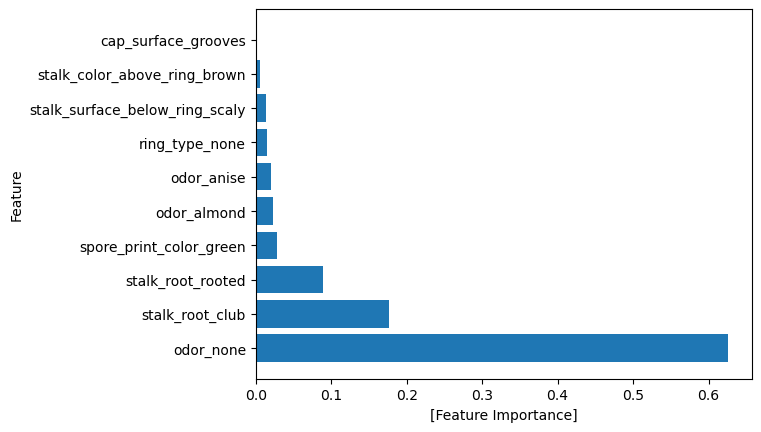

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.barh(best_feature, list(sorted(best_dict.keys(), reverse=True))[:10], align = 'center')
# plt.yticks(np.arange(len(Top10_best_features)), Top10_best_features)
plt.xlabel('[Feature Importance]')
plt.ylabel('Feature')
plt.show()